# Digitizers

Digitizers convert analogue data to digital data, this is achieved using an anaglogue-to-digital converter (ADC). Generally seismographs will continiously measure voltage associated with the movement of a mass, or force exerted to keep a mass stationary (in the case of force-balance seismographs). This continuous, analogue voltage is then converted to *counts* by a digitizer and recorded to disk, or transitted via some telemetry system to a data centre.

The main role of the digitizer therefore is to convert analogue voltages to digital counts. The **Nyquist-Shanon sampling theorum** states that: *If a function x(t) contains no frequencies higher than B hertz, it is completely determined by giving its ordinates at a series of points spaced 1/(2B) seconds apart.*
It is therefore possible to select a sampling frequency such that continuous data can be recreated by digital data. However, in practice, this idealised sampling frequency is rarely used in seismology due to the possible range of frequencies generated by earthquakes or other seismic sources coupled with the long-durations of recording.

This gives rise to the idea of a **Nyquist frequency**. This is the minimum rate at which a signal can be sampled without introducing errors, which is twice the highest frequency present in the signal. Thus, if you want to faithfully represent data up to 50Hz you must sample your data at at-least 100Hz (or a sample interval of 0.01s). This is a common sampling rate for regional earthquake seismology. We will think about how the frequency content of earthquake waveforms changes with distance when we think about attenuation.

In [1]:
# Set up notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

def decimate_and_plot(x, y, decimation_factors=[1, 10, 100, 200]):
    """Decimate data and plot it."""
    fig, ax = plt.subplots(1, figsize=(15, 8))
    for decimation_factor in [1, 10, 100, 200]:
        ax.plot(x[::decimation_factor], y[::decimation_factor],
                label="Decimation factor {0}".format(decimation_factor))
    legend = fig.legend()

Lets see how our choice of sampling-rate affects the signal that we record. We will start with a simple sine-wave and vary the sampling frequency.

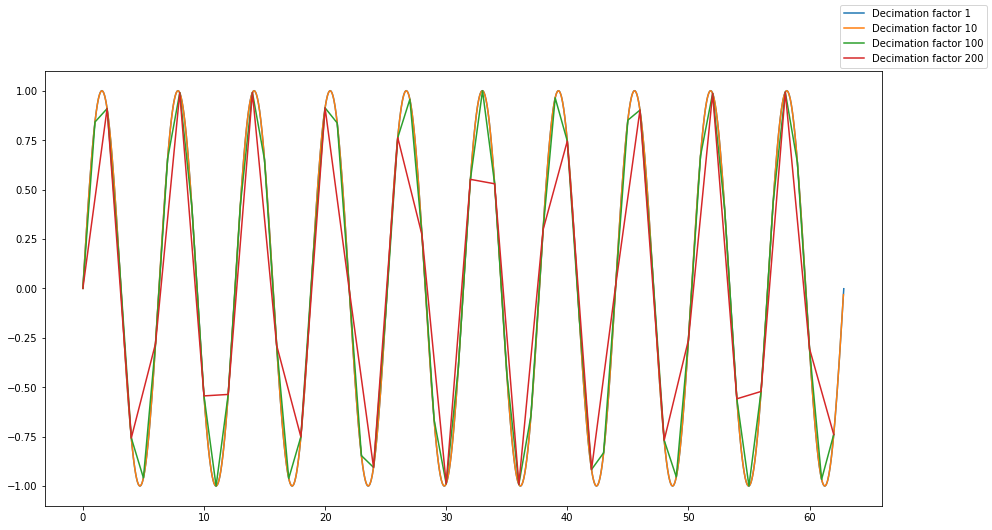

In [2]:
x = np.arange(0.0, 20 * np.pi, 0.01)
y = np.sin(x)
decimate_and_plot(x, y)

What about a slightly more interesting signal? Here we add in a second sine wave at twice the originals frequency. You can see that we lose fidelity with higher decimation factors. Higher decimation factors equal lower sampling frequencies.

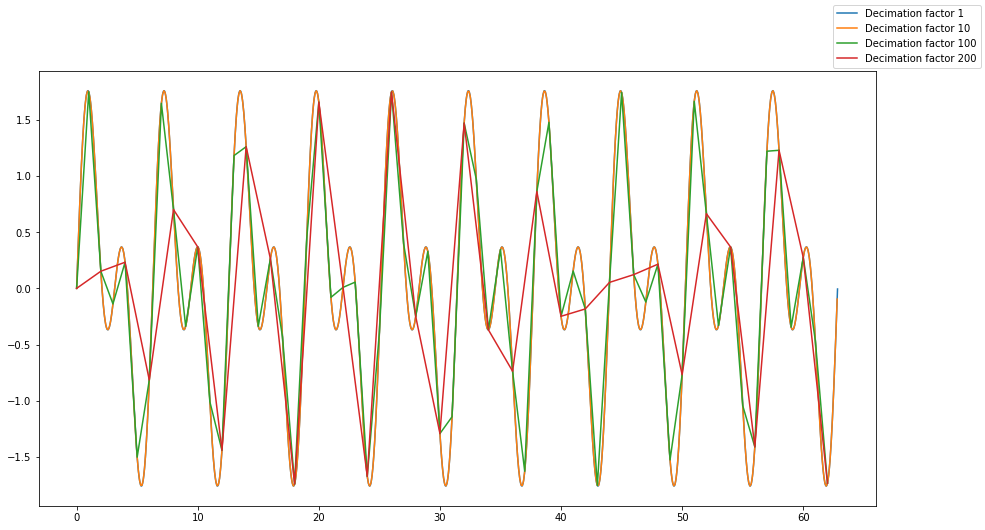

In [3]:
y += np.sin(x * 2)
decimate_and_plot(x, y)

Lets have a look at what this will look like for real seismic data - obspy's `read` function has a default stream to read in, lets look at that.

3 Trace(s) in Stream:
BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHN | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples
BW.RJOB..EHE | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


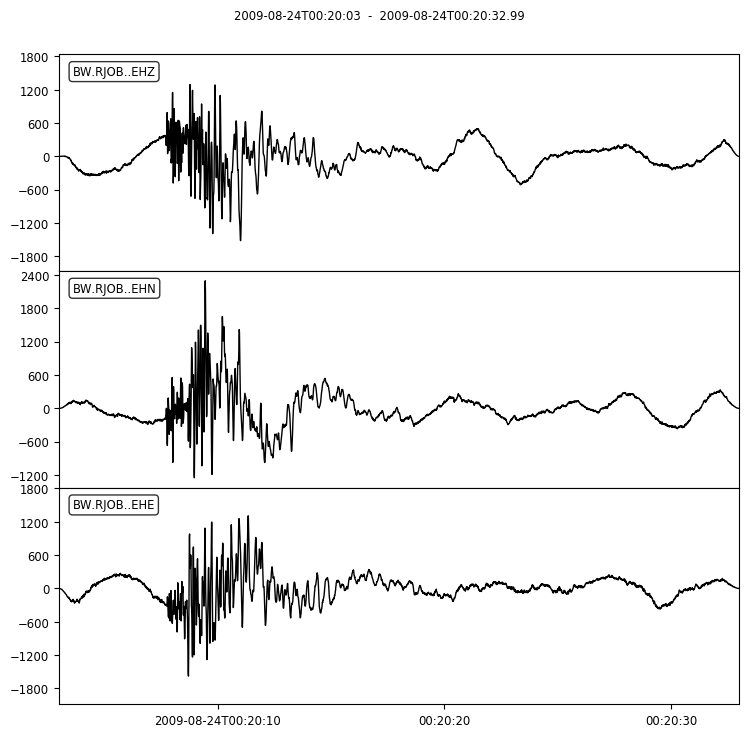

In [4]:
st = read()
print(st)
fig = st.plot()

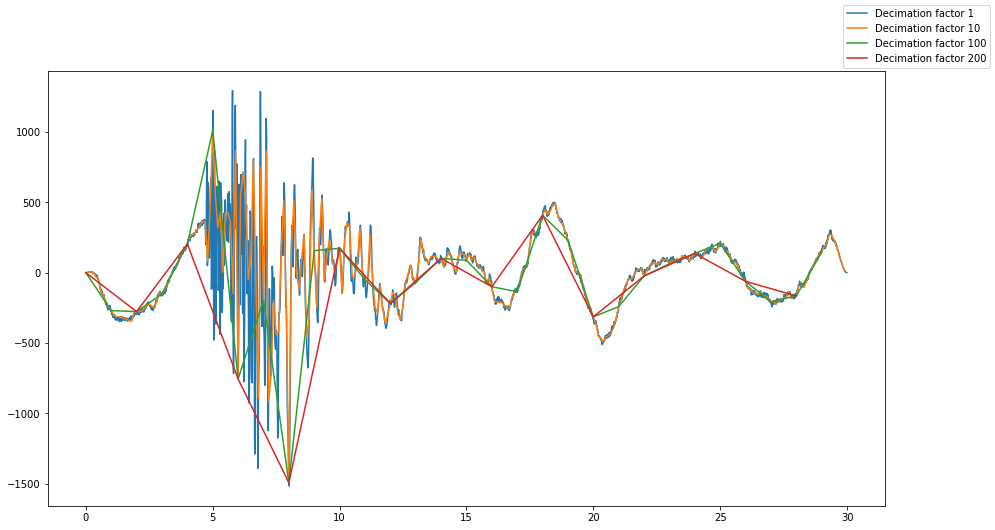

In [5]:
tr = st[0]
x = np.arange(0, tr.stats.npts * tr.stats.delta, tr.stats.delta)
y = tr.data
decimate_and_plot(x, y)

Clearly we lose fidelity very quickly, losing the high-frequencies more quickly. We will think about what frequencies these data contain in the next notebook. You should experiment with other decimation factors between 1 and 20.

In [6]:
# Play with other decimation factors between 1-20.

Obspy `Stream`s and `Trace`s also have convenience `decimate` methods for decimation by integer factors. Like most methods on obspy objects, this works in place (it changes the original data), so if you want to keep the old data you should work on a copy of the data (e.g. run `st2 = st.copy()` and work on `st2`).

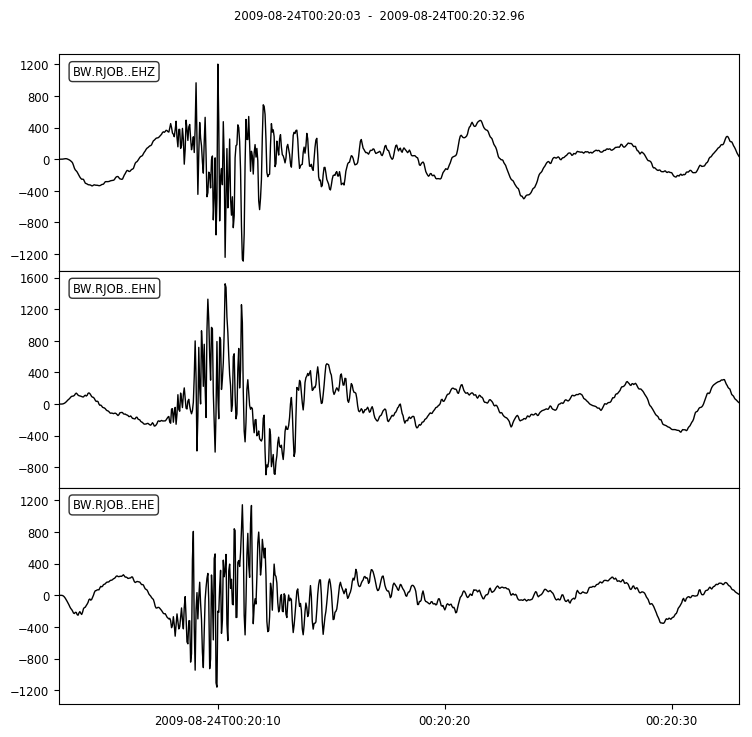

In [7]:
st.decimate(4)
fig = st.plot()

## To include:
- Pre-filtering
- Instrument response
- Poles and zeros
- FIR filters
- Note that once you don't record data you can never get it back.

This concludes our brief deomstration of digitizing continuous data.  It is worth pointing out that these ideas are not confined to seismic data: any continuous data can be sampled, and sampling does not have to be done in time.  For example, a line of gravity measurements is effectively a spatially sampled representation of the Earth's gravity field. If the transect has been regularly sampled then all of the ideas of Fourier Transforms can equally be applied to this dataset.  In the [next notebook](3_Fourier_Transforms.ipynb) we will look at how we compute the Fourier transform of seismic data.